## Welcome 
![Alt Text](https://media.giphy.com/media/3NtY188QaxDdC/giphy.gif)


In [1]:
import pandas as pd
data = pd.read_csv('headbrain.csv')
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
# Take the last two columns (Head Size(cm3) and Brain Weight(grams)) into XY
XY = data[['Head Size(cm^3)', 'Brain Weight(grams)']]
XY

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


In [5]:
#Print the different statistical values of data contained in XY using describe () function from pandas. 
XY.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [6]:
#Divide XY into X consisting of Head Size (cm3) and Y consisting of Brain Weight(grams). Print the shape of both.
X = XY['Head Size(cm^3)']
Y = XY['Brain Weight(grams)']

In [9]:
# Calculate the mean of X and Y
x_mean = X.mean()
y_mean = Y.mean()
print(f"x_mean = {x_mean}\ny_mean = {y_mean}")

x_mean = 3633.9915611814345
y_mean = 1282.873417721519


In [12]:
#calculate slope of regression line
b1=0.0
upper_part = sum((x - x_mean) * (y - y_mean) for x, y in zip(X,Y))
lower_part = sum((x - x_mean)**2 for x in X)
b1 = upper_part / lower_part
b1


0.26342933948939945

In [13]:
b0 = y_mean - (b1 * x_mean)
b0

325.57342104944223

In [18]:
result = b0 + b1 * X
ans = [{'X': X[i], 'Y': Y[i], 'Predicted': result[i]} for i in range(len(X))]
new_df = pd.DataFrame(ans)
new_df

,X,Y,Predicted
0,4512,1530,1514.166601
1,3738,1297,1310.272292
2,4261,1335,1448.045837
3,3777,1282,1320.546036
4,4177,1590,1425.917772
...,...,...,...
232,3214,1110,1172.235318
233,3394,1215,1219.652599
234,3233,1104,1177.240476
235,3352,1170,1208.588567


In [19]:
#  Display the regression line with Scatter plot (Head Size(cm3) in X-axis and Brain Weight (grams) in Y-axis).
import seaborn as sns
import matplotlib.pyplot as plt
def linear_regression_plot(X, Y, b0, b1):
    plt.scatter(X, Y)
    plt.plot(X, b0 + b1 * X, color='red')
    plt.xlabel('Head Size(cm^3)')
    plt.ylabel('Brain Weight(grams)')
    plt.show()

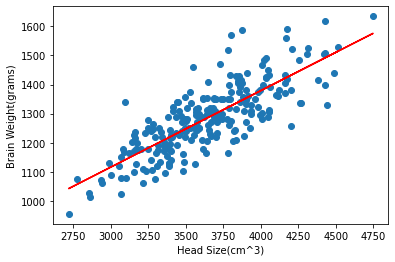

In [20]:
linear_regression_plot(X, Y, b0, b1)

In [22]:
#  Write code to calculate the Root Mean Square Error (RMSE).
def root_mean_square_error(Y, Y_pred):
    return (sum((Y - Y_pred)**2)/len(Y))**0.5
root_mean_square_error(Y, result)

72.1206213783709

In [24]:
#  Calculate the amount of the variation in the output dependent attribute which is predictable from the input independent variable using R2 score
def squared_error(Y, Y_pred):
    return sum((Y - Y_pred)**2)
def coffecient_of_determination(Y, Y_pred):
    return 1 - (squared_error(Y, Y_pred)/squared_error(Y, Y.mean()))
coffecient_of_determination(Y, result)


0.6393117199570003